In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('/project/ssverma_shared/projects/Endometriosis/Endo_Subtyping_Heterogeneity/Cluster_Training/')

In [2]:
! snakemake -n Pheno/FULL_PMBB_all_cleaned_phenos.csv

Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).


In [3]:
output_data='Data/non_genotyped_PMBB_data_for_no_snps_clustering.csv'
input_PMBB_cov='Pheno/FULL_PMBB_pheno_covars.csv'
input_PMBB_pheno='Pheno/FULL_PMBB_all_cleaned_phenos.csv'
input_geno_fam='/project/PMBB/PMBB-Release-2020-2.0/Genotype/PMBB-Release-2020-2.0_genetic_genotype.fam'
input_imp_fam='/project/PMBB/PMBB-Release-2020-2.0/Imputed/pgen/PMBB-Release-2020-2.0_genetic_imputed-topmed-r2_chr22.psam'

In [4]:
covDF = pd.read_csv(input_PMBB_cov,index_col='PMBB_ID')
covDF

,endometriosis_icd9,endometriosis_icd9_age@dx,uterine_endometriosis_icd9,uterine_endometriosis_icd9_age@dx,adenomyosis_icd9,adenomyosis_icd9_age@dx,not_uterine_endometriosis_icd9,not_uterine_endometriosis_icd9_age@dx,not_adeno_endo_icd9,not_adeno_endo_icd9_age@dx,...,alcohol_dependence_icd,alcohol_dependence_icd_age@dx,shortness_of_breath,shortness_of_breath_age@dx,shortness_of_breath_icd,shortness_of_breath_icd_age@dx,DATA_PULL_AGE,GENDER,RACE,ETHNICITY
PMBB_ID,,,,,,,,,,,,,,,,,,,,,
PMBB1000058643894,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,57.779603,Male,White,Not Hispanic or Latino
PMBB1000086054326,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,41.552361,Female,NaN,Not Hispanic or Latino
PMBB1000099138811,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,70.264203,Female,White,Not Hispanic or Latino
PMBB1000123579913,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,24.355921,Female,Black or African American,Not Hispanic or Latino
PMBB1000274307312,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,56.509240,Male,White,Not Hispanic or Latino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMBB9999693743459,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,55.619439,Female,Black or African American,Not Hispanic or Latino
PMBB9999699575208,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,1,42.277892,1,42.277892,51.460643,Male,Black or African American,Not Hispanic or Latino
PMBB9999913905213,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,50.340862,Female,Black or African American,Not Hispanic or Latino


In [5]:
pheno = pd.read_csv(input_PMBB_pheno, index_col='PMBB_ID')
pheno = pheno.loc[pheno.index.isin(covDF.index)]
pheno

,ICD_1,ICD_2,ICD_1_with_N80.0,ICD_2_with_N80.0,CC1_ALL,CC2_ALL,CC3_ALL,CC1_RA,CC2_RA,CC3_RA,...,rheumatoid_arthritis,systemic_lupus_erythematosus,multiple_sclerosis,asthma,nicotine_dependence,alcohol_dependence,shortness_of_breath,GENDER,RACE,ETHNICITY
PMBB_ID,,,,,,,,,,,,,,,,,,,,,
PMBB1000086054326,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,NaN,Not Hispanic or Latino
PMBB1000099138811,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,White,Not Hispanic or Latino
PMBB1000123579913,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,Black or African American,Not Hispanic or Latino
PMBB1000279001639,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,White,Not Hispanic or Latino
PMBB1000314700220,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,White,Hispanic Latino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMBB9999688670376,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,Some Other Race,Not Hispanic or Latino
PMBB9999693743459,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,Black or African American,Not Hispanic or Latino
PMBB9999913905213,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,Black or African American,Not Hispanic or Latino


In [6]:
geno_fam = pd.read_table(input_geno_fam, header=None, sep=' ', index_col=0)
imp_fam = pd.read_table(input_imp_fam, index_col='IID', sep='\s+')

all_genetic_data_samples = geno_fam.index.union(imp_fam.index)
print('Full PMBB:', len(pheno))
pheno = pheno[~pheno.index.isin(all_genetic_data_samples)]
print('Non-Genotyped PMBB:', len(pheno))

Full PMBB: 139554
Non-Genotyped PMBB: 117615


In [7]:
use_pheno = 'ICD_1_with_N80.0'

cases = pheno.index[pheno[use_pheno] == 1]
controls = (pheno[use_pheno] == 0).index

print(len(controls), len(cases))
print(pheno[use_pheno].fillna('NA').value_counts())

feature_cols = [c for c in covDF.columns if 'icd' not in c and ('age' not in c.lower() or c == 'miscarriage') and 'PC' not in c and 'ANCESTRY' not in c and 'SEX' not in c and 'Related' not in c]
feature_cols = [c for c in feature_cols if c[-5:] != '_last' and c[-6:] != '_first' and c[-5:].lower() != '_mean']

feature_df = covDF.loc[cases, feature_cols].copy()
all_binary_cols = [c for c in feature_df.columns if len(feature_df[c].dropna().unique()) == 2]
all_binary_cols.remove('type_2_diabetes')
print(f'Num Binary Features: {len(all_binary_cols)}')

prev_threshold = 0.05
drop_binary_cols = [c for c in all_binary_cols if feature_df.loc[cases, c].mean() < prev_threshold]
feature_df = feature_df.drop(columns=drop_binary_cols)
binary_cols = [c for c in all_binary_cols if c not in drop_binary_cols]
print(f'Num Non-Rare Binary Features: {len(binary_cols)}')

117615 4078
0    113537
1      4078
Name: ICD_1_with_N80.0, dtype: int64
Num Binary Features: 49
Num Non-Rare Binary Features: 22


In [66]:
endo_icd_subtypes = ['uterine_endometriosis']
endo_icd_subtypes.extend([c for c in all_binary_cols if 'endo_N80' in c])

long_term_outcomes = [c for c in all_binary_cols if 'cancer' in c]
long_term_outcomes.extend([c for c in all_binary_cols if 'infarction' in c])
long_term_outcomes.append('ischemic_heart_disease_acute')
long_term_outcomes.append('melanoma')
long_term_outcomes.append('non_hodgkins_lymphoma')

comorbidities = ['fibromyalgia', 'migraine', 'ibs',
                 'ulcerative_colitis', 'interstitial_cystitis', 'rheumatoid_arthritis',
                 'systemic_lupus_erythematosus', 'multiple_sclerosis', 'asthma',
                 'pcos', 'abnormal_cholesterol', 'hypertension', 'ischemic_heart_disease_chronic',
                 'chronic_pelvic_peritonitis']

symptoms = ['dysmenorrhea', 'dysuria', 'pain_with_sex', 'irregular_menstruation', 'shortness_of_breath', 'leiomyoma_of_uterus',
            'abdominal_pelvic_pain', 'lower_abdominal_pain']

pregnancy_related = ['preterm_labor', 'placental_disorders', 'hypertensive_pregnancy_issues', 'infertility',
                     'miscarriage', 'high_risk_pregnancy_supervision', 'uncomplicated_delivery_encounter',
                     'pregnancy_with_abortive_outcome']

len(long_term_outcomes)

10

In [81]:
import plotly.graph_objects as go
import kaleido

plot_df = covDF.loc[cases]

link_values = [len(endo_icd_subtypes), len(symptoms), len(pregnancy_related), len(comorbidities),
               len([c for c in symptoms if plot_df[c].mean() < 0.05]),
               len([c for c in pregnancy_related if plot_df[c].mean() < 0.05]),
               len([c for c in comorbidities if plot_df[c].mean() < 0.05]),
               len([c for c in symptoms if plot_df[c].mean() >= 0.05]),
               len([c for c in pregnancy_related if plot_df[c].mean() >= 0.05]),
               len([c for c in comorbidities if plot_df[c].mean() >= 0.05]),
               len(endo_icd_subtypes)]

red = 'rgba(255,0,0,0.6)'
green = 'rgba(0,255,0,0.6)'
blue = 'rgba(0,0,255,0.6)'
gray = 'rgba(100,100,100,0.6)'

fig = go.Figure(data=[
    go.Sankey(
        node = dict(
            pad = 15,
            thickness = 20,
            line = dict(color = "black", width = 0.5),
            label = [f"ICD-Extracted Features ({len(all_binary_cols) - len(long_term_outcomes)})",
                     f"Endometriosis ICD Subtypes ({len(endo_icd_subtypes)})",
                     f"Symptoms ({len(symptoms)})",
                     f"Pregnancy-Related ({len(pregnancy_related)})",
                     f"Comorbidities ({len(comorbidities)})",
                     f"Too Rare: <5% (13)", "Non-Rare: >5% (17)", ""],
            color = [gray,
                     gray, gray, gray, gray,
                     gray, green, gray]
        ),
        link = dict(
            source = [0, 0, 0, 0, 2, 3, 4, 2, 3, 4, 1],
            target = [1, 2, 3, 4, 5, 5, 5, 6, 6, 6, 7],
            value = link_values,
            label = link_values,
            color = [gray,
                     green, green, green,
                     gray, gray, gray,
                     green, green, green,
                     gray]
        )
    )
])

fig.update_layout(title_text="39 ICD Phenotypes to 17 Features Used for Clustering", font_size=12, width=900, height=600)
fig.write_image('../Manuscript_Plots/supp_figure_1_ICD_Sankey.png')
fig.show()

In [69]:
import json
icd_code_dict = json.load(open('Pheno/FULL_PMBB_ICD_codes.json'))
icd_code_dict

{'N80.*': ['N80.0',
  'N80.1',
  'N80.2',
  'N80.3',
  'N80.4',
  'N80.5',
  'N80.6',
  'N80.8',
  'N80.9'],
 '617.*': ['617.0',
  '617.1',
  '617.2',
  '617.3',
  '617.4',
  '617.5',
  '617.6',
  '617.8',
  '617.9'],
 'N80.0': ['N80.0'],
 '617.0': ['617.0'],
 'N80.03': [],
 '617.03': [],
 'N80.1': ['N80.1'],
 '617.1': ['617.1'],
 'N80.2': ['N80.2'],
 '617.2': ['617.2'],
 'N80.3': ['N80.3'],
 '617.3': ['617.3'],
 'N80.4': ['N80.4'],
 '617.4': ['617.4'],
 'N80.5': ['N80.5'],
 '617.5': ['617.5'],
 'N80.6': ['N80.6'],
 '617.6': ['617.6'],
 'N80.8': ['N80.8'],
 '617.8': ['617.8'],
 'N80.9': ['N80.9'],
 '617.9': ['617.9'],
 'C50': ['C50.011',
  'C50.012',
  'C50.019',
  'C50.021',
  'C50.022',
  'C50.029',
  'C50.111',
  'C50.112',
  'C50.119',
  'C50.121',
  'C50.122',
  'C50.129',
  'C50.211',
  'C50.212',
  'C50.219',
  'C50.221',
  'C50.222',
  'C50.229',
  'C50.311',
  'C50.312',
  'C50.319',
  'C50.321',
  'C50.322',
  'C50.411',
  'C50.412',
  'C50.419',
  'C50.421',
  'C50.422',
  '

In [70]:
import yaml
pheno_defs = yaml.safe_load(open('config_pheno.yaml'))['pheno_defs']
pheno_defs

{'endometriosis': {'icd10_cases': ['N80.*'], 'icd9_cases': ['617.*']},
 'uterine_endometriosis': {'icd10_cases': ['N80.0'], 'icd9_cases': ['617.0']},
 'adenomyosis': {'icd10_cases': ['N80.03'], 'icd9_cases': ['617.03']},
 'not_uterine_endometriosis': {'icd10_cases': ['N80.*'],
  'icd9_cases': ['617.*'],
  'icd10_exclude': ['N80.0'],
  'icd9_exclude': ['617.0']},
 'not_adeno_endo': {'icd10_cases': ['N80.*'],
  'icd9_cases': ['617.*'],
  'icd10_exclude': ['N80.03'],
  'icd9_exclude': ['617.03']},
 'endo_N80.1': {'icd10_cases': ['N80.1'], 'icd9_cases': ['617.1']},
 'endo_N80.2': {'icd10_cases': ['N80.2'], 'icd9_cases': ['617.2']},
 'endo_N80.3': {'icd10_cases': ['N80.3'], 'icd9_cases': ['617.3']},
 'endo_N80.4': {'icd10_cases': ['N80.4'], 'icd9_cases': ['617.4']},
 'endo_N80.5': {'icd10_cases': ['N80.5'], 'icd9_cases': ['617.5']},
 'endo_N80.6': {'icd10_cases': ['N80.6'], 'icd9_cases': ['617.6']},
 'endo_N80.8': {'icd10_cases': ['N80.8'], 'icd9_cases': ['617.8']},
 'endo_N80.9': {'icd10_c

In [71]:
pheno_codes_icd10 = {}
pheno_codes_icd9 = {}

for p, code_list in pheno_defs.items():
    if p not in all_binary_cols:
        continue
    pheno_codes_icd10[p] = []
    pheno_codes_icd9[p] = []
    if 'icd10_cases' in code_list.keys():
        # pheno_codes_icd10[p].extend([f'{c}*' for c in code_list['icd10_cases']])
        for c in code_list['icd10_cases']:
            pheno_codes_icd10[p].extend(icd_code_dict[c])
            # pass
    if 'icd9_cases' in code_list.keys():
        # pheno_codes_icd9[p].extend([f'{c}*' for c in code_list['icd9_cases']])
        for c in code_list['icd9_cases']:
            pheno_codes_icd9[p].extend(icd_code_dict[c])
            # pass

In [84]:
feature_table = pd.DataFrame(index=all_binary_cols)
feature_table.index.name = 'Phenotype'

feature_table.loc[long_term_outcomes, 'Category'] = 'Long-Term Outcomes'
feature_table.loc[symptoms, 'Category'] = 'Symptoms'
feature_table.loc[pregnancy_related, 'Category'] = 'Pregnancy-Related'
feature_table.loc[comorbidities, 'Category'] = 'Comorbidities'
feature_table.loc[endo_icd_subtypes, 'Category'] = 'Endometriosis ICD Subtypes'

feature_table = feature_table[feature_table['Category'] != 'Long-Term Outcomes']

feature_table['Prevalence'] = covDF[feature_table.index].mean()
feature_table['Prevalence in Cases'] = covDF.loc[cases, feature_table.index].mean()
feature_table[['Prev-fmt', 'Prev-Case-fmt']] = feature_table[['Prevalence', 'Prevalence in Cases']].applymap(lambda x: f'{x*100:.1f}%')

feature_table['ICD-9'] = pd.Series(pheno_codes_icd9)
feature_table['ICD-10'] = pd.Series(pheno_codes_icd10)
feature_table[['ICD-9-fmt', 'ICD-10-fmt']] = feature_table[['ICD-9', 'ICD-10']].applymap(lambda x: ', '.join(x))

feature_table = feature_table.rename(index = {'endo_N80.1': 'endometrioma',
                                              'endo_N80.3': 'superficial_lesions',
                                              'endo_N80.2': 'endo_of_fallopian_tubes',
                                              'endo_N80.4': 'vaginal_endo',
                                              'endo_N80.5': 'endo_of_intestine',
                                              'endo_N80.6': 'endo_in_cutaneous_scar',
                                              'endo_N80.8': 'other_endo',
                                              'endo_N80.9': 'unspecified_endo',
                                              'uterine_endometriosis': 'uterine_endo'}
)

feature_table['Pheno-fmt'] = feature_table.index.to_series().str.replace('_', ' ')

feature_table = feature_table.reset_index().set_index(['Category', 'Pheno-fmt']).sort_index()

feature_table[[c for c in feature_table.columns if 'fmt' in c]].to_csv('../Manuscript_Tables/supp_table_1_features.csv')
feature_table[[c for c in feature_table.columns if 'fmt' in c]]

Prev-fmt  \
Category                   Pheno-fmt                                   
Comorbidities              abnormal cholesterol                41.6%   
                           asthma                              15.2%   
                           chronic pelvic peritonitis           0.0%   
                           fibromyalgia                         4.2%   
                           hypertension                        41.0%   
                           ibs                                  4.8%   
                           interstitial cystitis                0.5%   
                           ischemic heart disease chronic      13.9%   
                           migraine                             8.0%   
                           multiple sclerosis                   1.0%   
                           pcos                                 1.9%   
                           rheumatoid arthritis                 2.3%   
                           systemic lupus erythematosus         0.9%   
                           ulcerative colitis                   1.7%   
Endometriosis ICD Subtypes endo in cutaneous scar               0.0%   
                           endo of fallopian tubes              0.1%   
                           endo of intestine                    0.0%   
                           endometrioma                         0.2%   
                           other endo                           0.1%   
                           superficial lesions                  0.2%   
                           unspecified endo                     1.3%   
                           uterine endo                         1.3%   
                           vaginal endo                         0.0%   
Pregnancy-Related          high risk pregnancy supervision      4.7%   
                           hypertensive pregnancy issues        2.6%   
                           infertility                          2.4%   
                           miscarriage                          1.4%   
                           placental disorders                  1.1%   
                           pregnancy with abortive outcome      0.8%   
                           preterm labor                        0.6%   
                           uncomplicated delivery encounter     1.9%   
Symptoms                   abdominal pelvic pain               25.4%   
                           dysmenorrhea                         1.9%   
                           dysuria                              6.7%   
                           irregular menstruation               8.8%   
                           leiomyoma of uterus                  4.6%   
                           lower abdominal pain                 9.4%   
                           pain with sex                        0.9%   
                           shortness of breath                 10.6%   

                                                            Prev-Case-fmt  \
Category                   Pheno-fmt                                        
Comorbidities              abnormal cholesterol                     32.7%   
                           asthma                                   26.2%   
                           chronic pelvic peritonitis                0.0%   
                           fibromyalgia                              8.7%   
                           hypertension                             33.5%   
                           ibs                                      12.3%   
                           interstitial cystitis                     2.5%   
                           ischemic heart disease chronic            4.3%   
                           migraine                                 22.3%   
                           multiple sclerosis                        1.4%   
                           pcos                                      6.1%   
                           rheumatoid arthritis                      2.4%   
                           sy

In [74]:
icd_9_set = []
for k, v in pheno_codes_icd9.items():
    icd_9_set.extend(v)

icd_10_set = []
for k, v in pheno_codes_icd10.items():
    icd_10_set.extend(v)

len(set(icd_9_set)), len(set(icd_10_set))

(345, 914)

In [85]:
len(cases)

4078

In [87]:
cont_cols = [c for c in feature_df.columns if c not in binary_cols and len(feature_df[c].dropna().unique()) > 2]

print(len(binary_cols), ', '.join(binary_cols))
print(len(drop_binary_cols), ', '.join(drop_binary_cols))
print(len(cont_cols), ', '.join(cont_cols))

long_term_outcomes = [c for c in binary_cols if 'cancer' in c]
long_term_outcomes.extend([c for c in binary_cols if 'infarction' in c])
long_term_outcomes.append('ischemic_heart_disease_acute')
long_term_outcomes.append('melanoma')

risk_factor_cols = sorted([c for c in binary_cols if
                           'endo' not in c and 'pregnancy_symptoms' not in c and c not in long_term_outcomes])
# risk_factor_cols.remove('ulcerative_colitis')
# risk_factor_cols.remove('crohns')
# risk_factor_cols.remove('type_2_diabetes')
risk_factor_age_cols = [c + '_age@dx' for c in risk_factor_cols]

risk_factor_df = covDF.loc[cases, risk_factor_cols].copy()

22 uterine_endometriosis, endo_N80.1, endo_N80.3, endo_N80.9, breast_cancer, leiomyoma_of_uterus, pcos, abnormal_cholesterol, hypertension, dysmenorrhea, pain_with_sex, infertility, high_risk_pregnancy_supervision, abdominal_pelvic_pain, lower_abdominal_pain, dysuria, fibromyalgia, migraine, ibs, irregular_menstruation, asthma, shortness_of_breath
27 endo_N80.2, endo_N80.4, endo_N80.5, endo_N80.6, endo_N80.8, cervical_cancer, ovarian_cancer, uterine_cancer, non_hodgkins_lymphoma, melanoma, thyroid_cancer, acute_myocardial_infarction, ischemic_heart_disease_acute, ischemic_heart_disease_chronic, cerebral_infarction, chronic_pelvic_peritonitis, hypertensive_pregnancy_issues, placental_disorders, preterm_labor, uncomplicated_delivery_encounter, pregnancy_with_abortive_outcome, miscarriage, ulcerative_colitis, interstitial_cystitis, rheumatoid_arthritis, systemic_lupus_erythematosus, multiple_sclerosis
2 RACE, ETHNICITY


4078


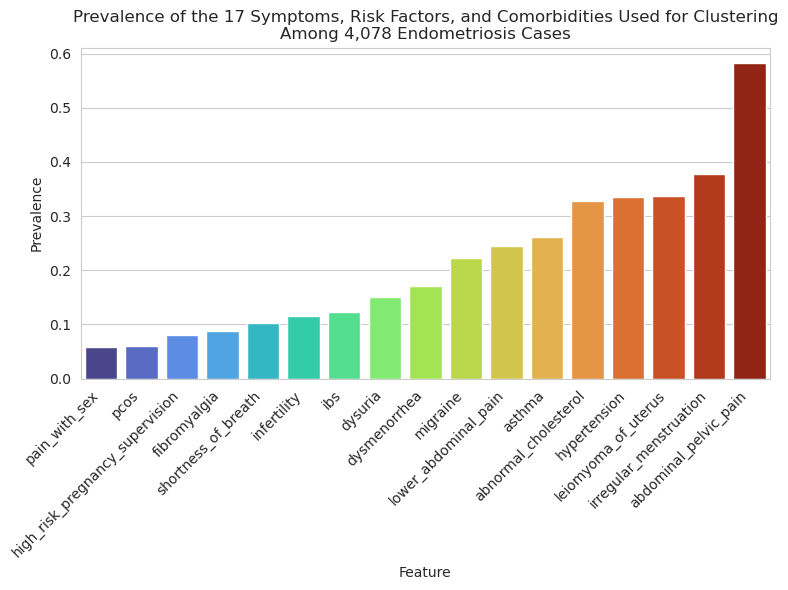

Feature
pain_with_sex                      0.058852
pcos                               0.060569
high_risk_pregnancy_supervision    0.081167
fibromyalgia                       0.087052
shortness_of_breath                0.102011
infertility                        0.116233
ibs                                0.122854
dysuria                            0.151300
dysmenorrhea                       0.170672
migraine                           0.222658
lower_abdominal_pain               0.243992
asthma                             0.261648
abnormal_cholesterol               0.327366
hypertension                       0.334723
leiomyoma_of_uterus                0.337666
irregular_menstruation             0.377881
abdominal_pelvic_pain              0.581903
Name: Cluster Set, dtype: float64

In [91]:
print(len(cases))
feature_prev = risk_factor_df.mean().sort_values()
plt.gcf().set_size_inches(8, 6)
sns.barplot(x=feature_prev.index, y=feature_prev.values, palette='turbo', hue=feature_prev.index, legend=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Prevalence')
plt.xlabel('Feature')
plt.title('Prevalence of the 17 Symptoms, Risk Factors, and Comorbidities Used for Clustering\nAmong 4,078 Endometriosis Cases')
plt.tight_layout()
plt.savefig('../Manuscript_Plots/supp_figure_2_feature_prevalence.png', bbox_inches='tight')
plt.show()
feature_prev.name = 'Cluster Set'
feature_prev.index.name = 'Feature'
feature_prev.to_csv('../Feature_Extraction/clustering_set_prev.csv')
feature_prev

In [ ]:
feature_corr = risk_factor_df.corr() ** 2
plt.gcf().set_size_inches(12, 8)
sns.heatmap(feature_corr, vmin=0, vmax=1)
plt.savefig('Plots/feature_correlation.png', bbox_inches='tight')
plt.show()

feature_corr.apply(lambda x: x.index[x.between(0.3, 0.99)], axis=1)

In [ ]:
risk_factor_df.index.name = 'IID'
print(risk_factor_df)
output_data